In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('exchange_rate.csv')
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [6]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M', dayfirst=True)

In [8]:
df.isnull().sum()

,0
date,0
Ex_rate,0


In [10]:
df['Ex_rate'].describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


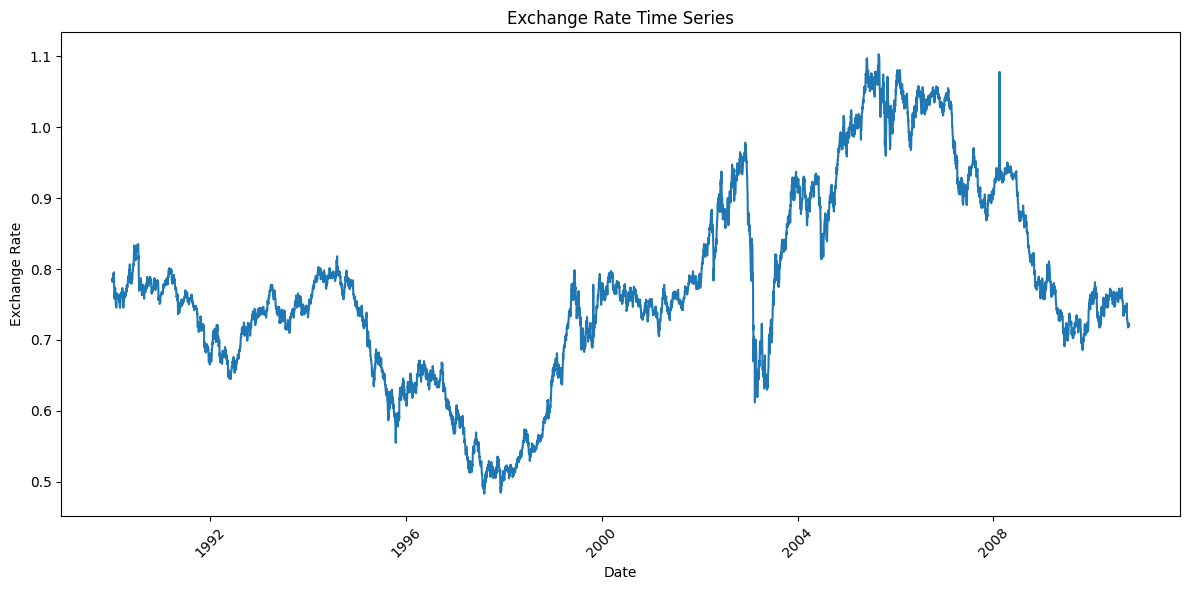

In [11]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['Ex_rate'])
plt.title('Exchange Rate Time Series')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

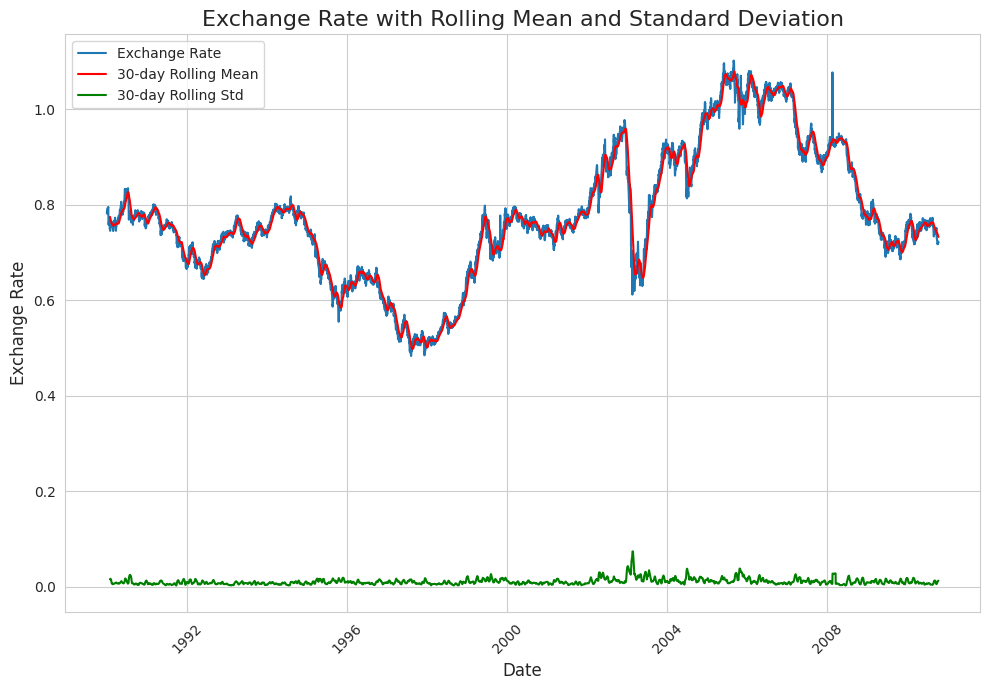

In [15]:
# Calculate and plot rolling statistics
rolling_mean = df['Ex_rate'].rolling(window=30).mean()
rolling_std = df['Ex_rate'].rolling(window=30).std()

plt.figure(figsize=(10, 7))
plt.plot(df['date'], df['Ex_rate'], label='Exchange Rate')
plt.plot(df['date'], rolling_mean, label='30-day Rolling Mean', color='red')
plt.plot(df['date'], rolling_std, label='30-day Rolling Std', color='green')
plt.title('Exchange Rate with Rolling Mean and Standard Deviation', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Exchange Rate', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

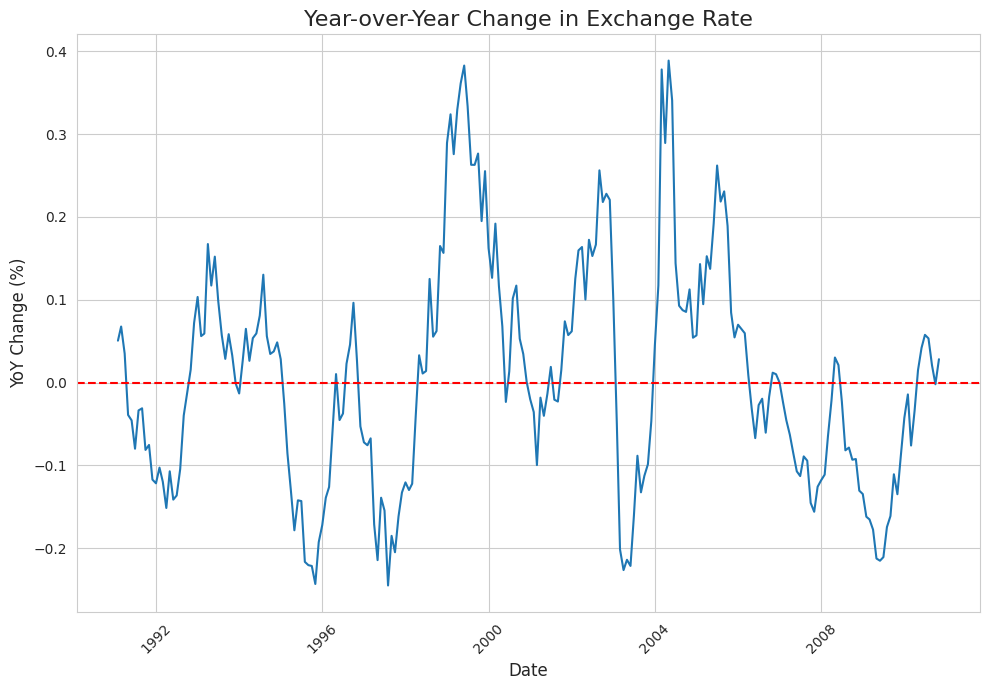

In [17]:
df_monthly = df.set_index('date').resample('M').last()
df_monthly['YoY_Change'] = df_monthly['Ex_rate'].pct_change(periods=12)

plt.figure(figsize=(10, 7))
plt.plot(df_monthly.index, df_monthly['YoY_Change'])
plt.title('Year-over-Year Change in Exchange Rate', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('YoY Change (%)', fontsize=12)
plt.axhline(y=0, color='r', linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()

In [18]:
from statsmodels.tsa.stattools import adfuller
# Check for stationarity
def test_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

print("Stationarity Test Results:")
test_stationarity(df['Ex_rate'])

Stationarity Test Results:
ADF Statistic: -1.6649941807382342
p-value: 0.4492327353597477
Critical Values: {'1%': -3.4312123140180137, '5%': -2.861921078147796, '10%': -2.5669728434336108}


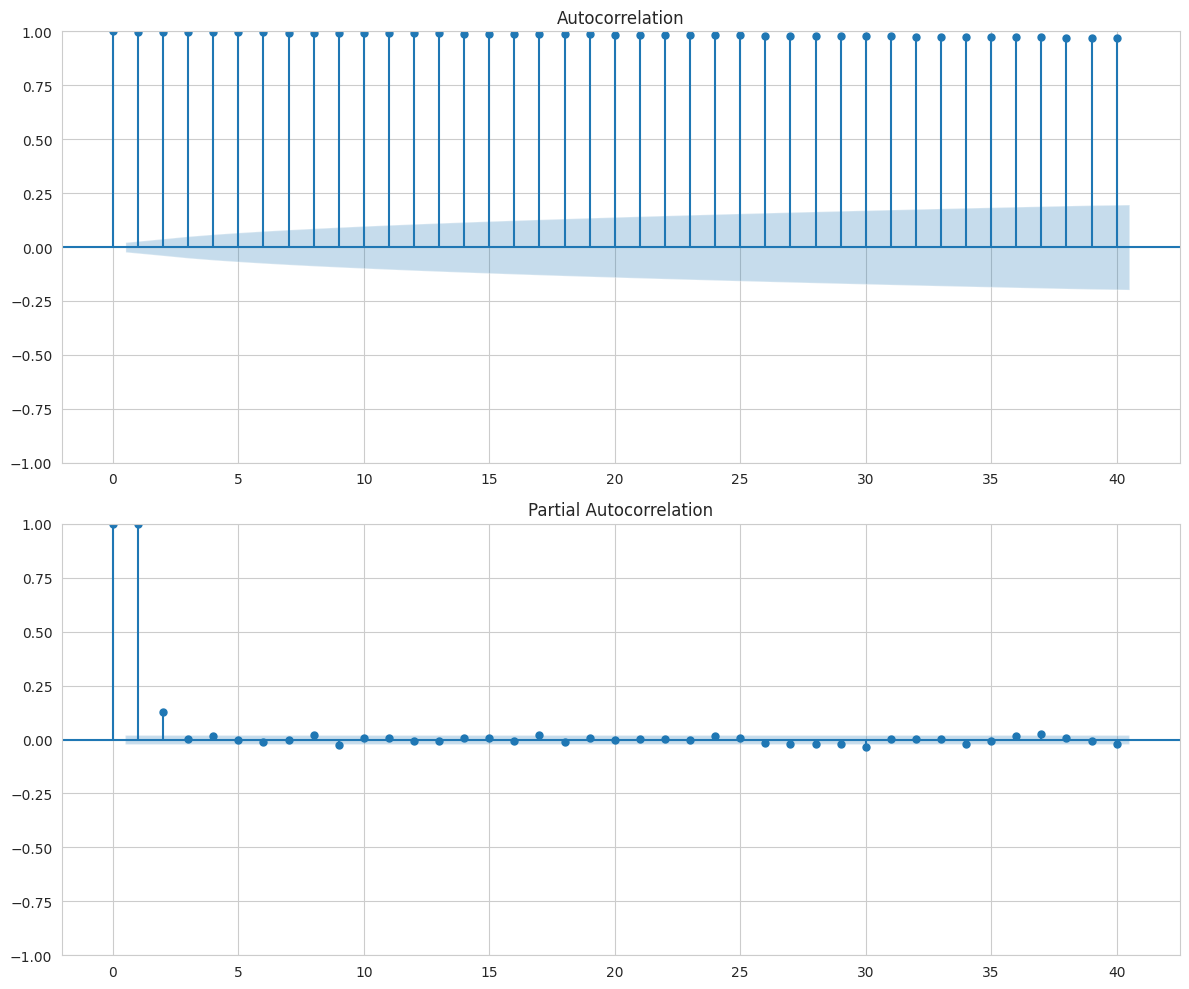

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
plot_acf(df['Ex_rate'], ax=ax1, lags=40)
plot_pacf(df['Ex_rate'], ax=ax2, lags=40)
plt.tight_layout()

In [22]:
from statsmodels.tsa.arima.model import ARIMA
# Based on the ACF and PACF plots, we'll start with ARIMA(1,1,1)
model = ARIMA(df['Ex_rate'], order=(1,1,1))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Sat, 10 Aug 2024   AIC                         -56102.322
Time:                        14:30:16   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

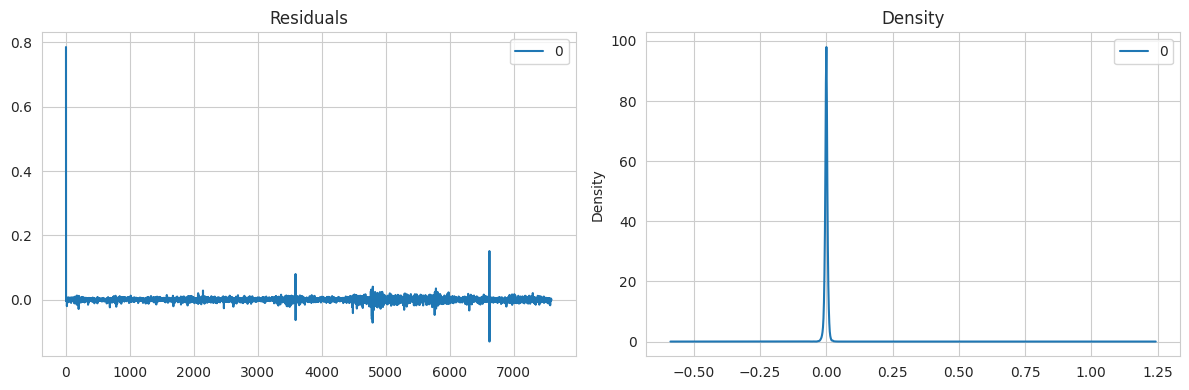

In [23]:
# Plot residuals
residuals = pd.DataFrame(results.resid)
fig, ax = plt.subplots(1,2, figsize=(12,4))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.tight_layout()

In [24]:
# Forecast
train = df['Ex_rate'][:int(0.8*len(df))]
test = df['Ex_rate'][int(0.8*len(df)):]

model = ARIMA(train, order=(1,1,1))
fitted = model.fit()

# Forecast
fc = fitted.forecast(steps=len(test))
fc_series = pd.Series(fc, index=test.index)

In [25]:
# Calculate RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(test, fc)
rmse = sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 0.2054366965966928


In [26]:
# Check unique date formats in the dataset
unique_dates = df['date'].unique()
print(unique_dates[:20])

<DatetimeArray>
['1990-01-01 00:00:00', '1990-01-02 00:00:00', '1990-01-03 00:00:00',
 '1990-01-04 00:00:00', '1990-01-05 00:00:00', '1990-01-06 00:00:00',
 '1990-01-07 00:00:00', '1990-01-08 00:00:00', '1990-01-09 00:00:00',
 '1990-01-10 00:00:00', '1990-01-11 00:00:00', '1990-01-12 00:00:00',
 '1990-01-13 00:00:00', '1990-01-14 00:00:00', '1990-01-15 00:00:00',
 '1990-01-16 00:00:00', '1990-01-17 00:00:00', '1990-01-18 00:00:00',
 '1990-01-19 00:00:00', '1990-01-20 00:00:00']
Length: 20, dtype: datetime64[ns]
done


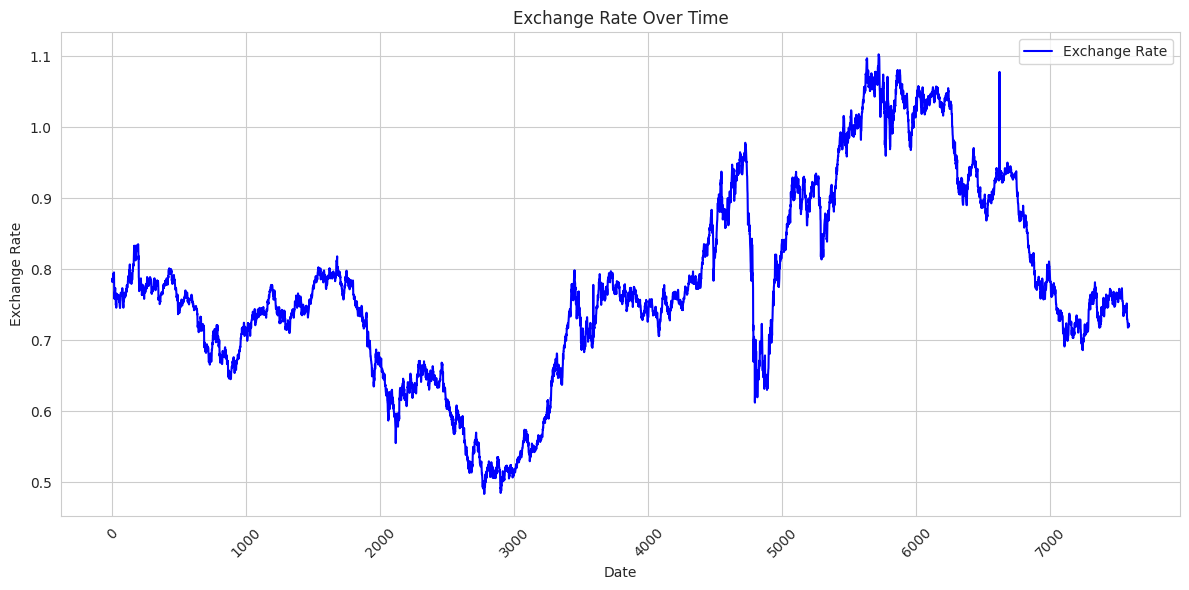

In [27]:
# Plot the exchange rate data to analyze trends and seasonality
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Ex_rate'], label='Exchange Rate', color='blue')
plt.title('Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

**Based on the characteristics observed in the plot, we can determine the appropriate Exponential Smoothing model:**

* If there is no trend or seasonality, we can use Simple Exponential Smoothing.
* If there is a trend but no seasonality, we can use Holt’s Linear.
* If there is both trend and seasonality, we can use Holt-Winters.

In [28]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import ParameterGrid

# Define the parameter grid for Holt-Winters model
param_grid = ParameterGrid({
    'trend': ['add', 'mul'],
    'seasonal': ['add', 'mul', None],
    'seasonal_periods': [12]  # Assuming monthly data
})



In [31]:
# Function to evaluate the model using AIC
import numpy as np
def evaluate_model(params):
    model = ExponentialSmoothing(df['Ex_rate'], **params)
    fit = model.fit()
    return fit.aic

# Find the best parameters based on AIC
best_aic = np.inf
best_params = None
for params in param_grid:
    try:
        aic = evaluate_model(params)
        if aic < best_aic:
            best_aic = aic
            best_params = params
    except:
        continue

print(f"Best Parameters: {best_params}")
print(f"Best AIC: {best_aic}")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


Best Parameters: {'seasonal': None, 'seasonal_periods': 12, 'trend': 'mul'}
Best AIC: -77641.16854620985


In [33]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pandas as pd
import matplotlib.pyplot as plt

# Fit the model with the best parameters
best_model = ExponentialSmoothing(df['Ex_rate'], trend='mul', seasonal=None)
fitted_model = best_model.fit()

# Generate forecasts for the next 30 days
forecast_horizon = 30
forecast = fitted_model.forecast(steps=forecast_horizon)

# Create a date range for the forecast
#last_date = df.index[-1]
#forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_horizon)
#forecast.index = forecast_dates

Forecast for the next 30 days:


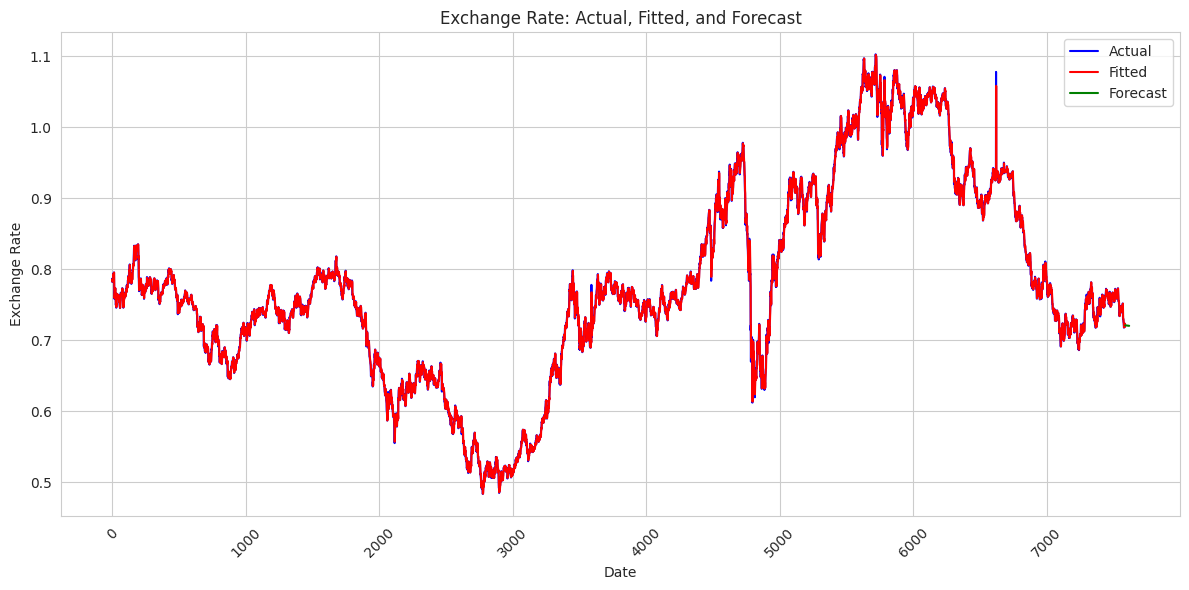

In [34]:
# Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Ex_rate'], label='Actual', color='blue')
plt.plot(df.index, fitted_model.fittedvalues, label='Fitted', color='red')
plt.plot(forecast.index, forecast, label='Forecast', color='green')
plt.title('Exchange Rate: Actual, Fitted, and Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
print("Forecast for the next 30 days:")

**This forecast suggests that the exchange rate is expected to remain relatively stable over the next 30 days, with a very slight downward trend.**

In [35]:
# Split the data into train and test sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

In [36]:
# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [37]:
# Holt-Winters Model
hw_model = ExponentialSmoothing(train['Ex_rate'], trend='mul', seasonal=None)
hw_fit = hw_model.fit()
hw_forecast = hw_fit.forecast(steps=len(test))

In [38]:
# ARIMA Model
arima_model = ARIMA(train['Ex_rate'], order=(1,1,1))
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(steps=len(test))

In [40]:
# Compute error metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
models = ['Holt-Winters', 'ARIMA']
forecasts = [hw_forecast, arima_forecast]
metrics = []

for name, forecast in zip(models, forecasts):
    mae = mean_absolute_error(test['Ex_rate'], forecast)
    rmse = np.sqrt(mean_squared_error(test['Ex_rate'], forecast))
    mape = mean_absolute_percentage_error(test['Ex_rate'], forecast)
    metrics.append([name, mae, rmse, mape])

metrics_df = pd.DataFrame(metrics, columns=['Model', 'MAE', 'RMSE', 'MAPE'])
print("Error Metrics:")
print(metrics_df.to_string(index=False))

Error Metrics:
       Model     MAE     RMSE      MAPE
Holt-Winters 0.20583 0.238264 26.411858
       ARIMA 0.17771 0.205437 22.797966


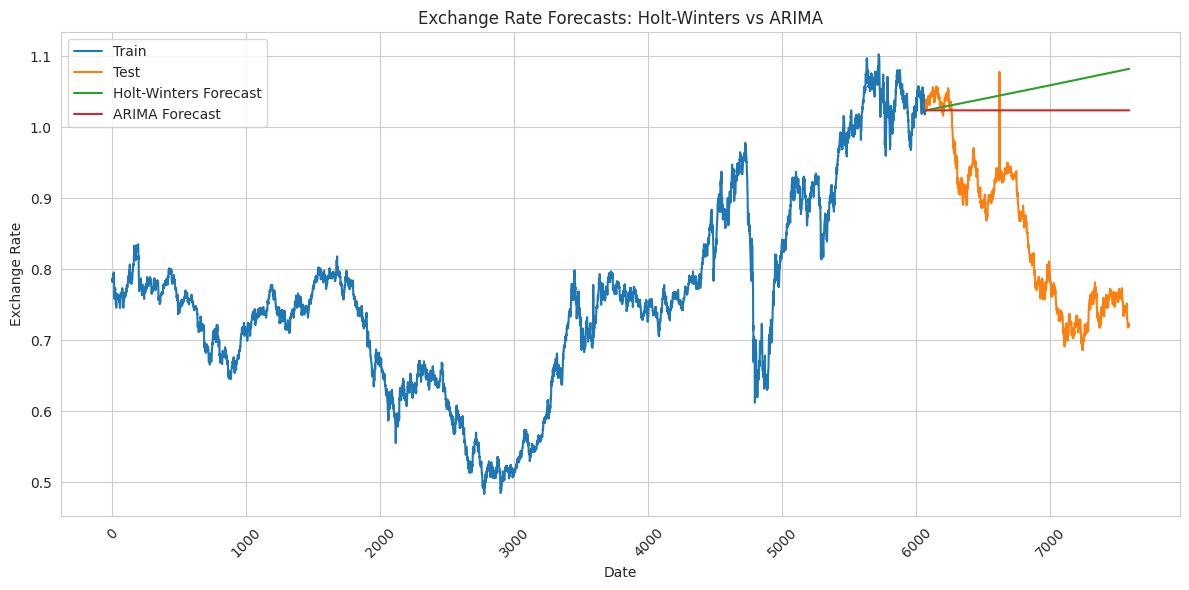

In [41]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Ex_rate'], label='Train')
plt.plot(test.index, test['Ex_rate'], label='Test')
plt.plot(test.index, hw_forecast, label='Holt-Winters Forecast')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast')
plt.title('Exchange Rate Forecasts: Holt-Winters vs ARIMA')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

### Model Comparison:

Based on the error metrics, we can compare the performance of the Holt-Winters and ARIMA models:

**a) ARIMA Model:**
   - MAE: 0.1777
   - RMSE: 0.2054

**b) Holt-Winters Model:**
   - MAE: 0.2059
   - RMSE: 0.2384

### Performance:
The ARIMA model outperforms the Holt-Winters model in both MAE and RMSE metrics. It has lower values for both, indicating that its predictions are, on average, closer to the actual values.



### Advantages and Limitations:

**ARIMA:**
+ Advantages: Better performance in this case, capable of capturing both trend and seasonal patterns.
+ Limitations: Assumes linear relationships, may not capture complex non-linear patterns.

**Holt-Winters:**
+ Advantages: Simple to understand and implement, works well for data with clear trend and seasonality.
+ Limitations: Less flexible than ARIMA, performed slightly worse in this case.




### Conclusion:

Based on analysis:

**1. Model Performance:** The ARIMA model performed better than the Holt-Winters model for this dataset, as evidenced by its lower MAE and RMSE values.

**2. Forecast Accuracy:** Both models seem to capture the general trend of the exchange rates, but the ARIMA model's predictions appear to be slightly closer to the actual values.

**3. Best Model:** For this particular dataset, the ARIMA model yields the best performance for forecasting exchange rates. Its lower error metrics suggest that it's more accurate in predicting future values.
